In [1]:
sys.path.insert(0, './common')

import sys
import wave
import ppo_model

c:\Users\nathan\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
env_path = 'env01/Wave'

In [3]:
env = wave.WaveEnv(env_path, worker_id=32, timescale=15)

WAVE environment created.


In [4]:
# BEST PPO 
# hidden_layer = 1024
# ppo_epochs = 5
# clip = 0.2
# minibatch_size=128

hidden_layer = 512
ppo_epochs = 10
clip = 0.2
minibatch_size = 64
model = ppo_model.PPO(127, 2, hidden_layer, minibatch_size=minibatch_size, ppo_epochs=ppo_epochs, clip=clip, lr=5e-4)

In [5]:
save_path = f'./results/env01/ppo/512-256-nstep'
model.set_model_save_path(save_path)

In [ ]:
model.load_model()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


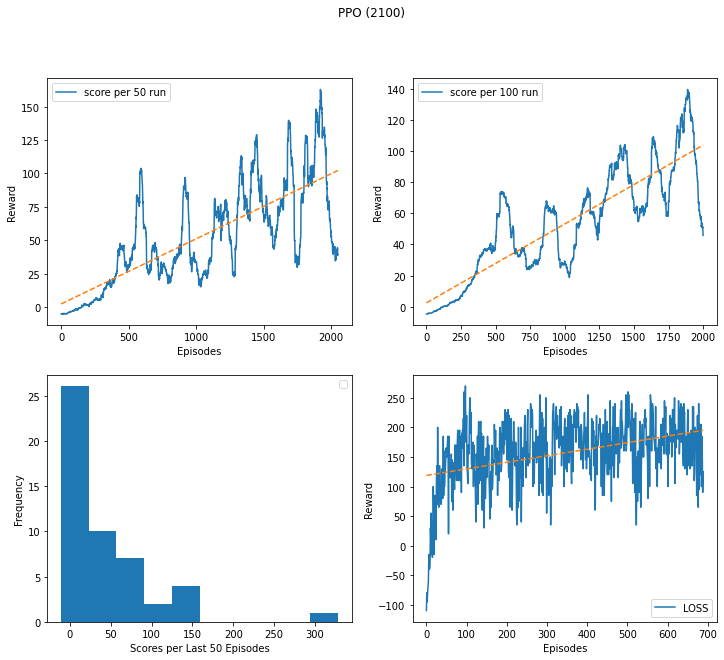

EPOCH: 2099, total reward: 3.0899992287158966, timestep: 239, lr: 0.00040500000000000003
EPOCH: 2100, total reward: 6.2599983513355255, timestep: 175, lr: 0.00040500000000000003
EPOCH: 2101, total reward: 111.87998749315739, timestep: 563, lr: 0.00040500000000000003
EPOCH: 2102, total reward: -6.280000135302544, timestep: 26, lr: 0.00040500000000000003
EPOCH: 2103, total reward: 16.289997696876526, timestep: 175, lr: 0.00040500000000000003
EPOCH: 2104, total reward: 41.169992193579674, timestep: 377, lr: 0.00040500000000000003
EPOCH: 2105, total reward: 33.71999529004097, timestep: 326, lr: 0.00040500000000000003
EPOCH: 2106, total reward: -9.879999920725822, timestep: 98, lr: 0.00040500000000000003
EPOCH: 2107, total reward: 66.12999050319195, timestep: 378, lr: 0.00040500000000000003
EPOCH: 2108, total reward: 109.95998667180538, timestep: 601, lr: 0.00040500000000000003
EPOCH: 2109, total reward: 49.32999204099178, timestep: 314, lr: 0.00040500000000000003
EPOCH: 2110, total reward:

KeyboardInterrupt: 

In [7]:
model.set_train_params(max_step=1000, plot_smooth=50, gamma=0.99)
model.train(env, 9500, show_plot=True, lr_decay_interval=1000)

In [ ]:
model.save_model()

In [ ]:
import saver
saver.save_wave_model(hidden_layer, f'{save_path}/actor.pth', f'{save_path}/model.onnx')

In [ ]:
model.plot_train_memory(smooth=100)

In [ ]:
env = wave.WaveEnv(env_path, 25, worker_id=1)
model.test(env)

In [ ]:
model.test_avg(env, 100)

In [ ]:
# PPO 10,000 EPOCH (133.60158157750965, 692.35)
# PPO 20,000 EPOCH (457.071340264678, 2085.91)

In [ ]:
env.close()